In [1]:
!pip install specklepy --upgrade

In [2]:
from specklepy.api.client import SpeckleClient
from specklepy.api.credentials import get_default_account
host = "https://speckle.xyz/"
client = SpeckleClient(host=host)
# replace with your token
token = "a31bebde91e0c1c9bdad27f72543535151ef61b549"
client.authenticate_with_token(token=token)

In [3]:
from specklepy.transports.server import ServerTransport
# replace with your stream id
streamId = "14568be237"
stream = client.stream.get(id=streamId)

transport = ServerTransport(client=client, stream_id=streamId)
transport

ServerTransport(url='https://speckle.xyz', stream_id='14568be237', account=Account(email: chuongpqvn@gmail.com, server: https://speckle.xyz, isDefault: True), saved_obj_count=0, session=<requests.sessions.Session object at 0x000001264DCC24F0>, _batch_sender=<specklepy.transports.server.batch_sender.BatchSender object at 0x000001264DCC26D0>)

In [4]:
from specklepy.api import operations
commits = client.commit.list(stream_id=streamId)
for i in commits:
    print(i.createdAt)

2023-01-19 06:46:54.788000+00:00
2023-01-19 05:57:37.587000+00:00
2023-01-19 05:53:22.943000+00:00
2023-01-19 04:36:43.222000+00:00
2023-01-19 04:36:16.307000+00:00
2023-01-19 04:35:37.446000+00:00
2023-01-19 04:35:08.233000+00:00
2023-01-19 03:55:16.067000+00:00
2023-01-19 03:46:07.603000+00:00
2023-01-18 11:36:23.225000+00:00


In [5]:
from specklepy.api import operations
commit = client.commit.list(stream_id=streamId)[0]
print(commit)
received_base = operations.receive(commit.referencedObject, remote_transport=transport)
received_base

Commit( id: 1ad5fe23f0, message: Send 6 clashes test from Navisworks, referencedObject: 6cc99c8707ff9e76721d00a63f6120c0, authorName: Hồ Văn Chương, branchName: main, createdAt: 2023-01-19 06:46:54.788000+00:00 )


Base(id: 6cc99c8707ff9e76721d00a63f6120c0, speckle_type: Base, totalChildrenCount: 0)

In [6]:
clashtests = received_base["ClashTests"]
clashtests

[Base(id: 0cb02822a70ad66b61b8a784c9d845b1, speckle_type: ClashModel.ClashTest, totalChildrenCount: 0),
 Base(id: d2eed40c3a5bc712c46059ee7e7ac83d, speckle_type: ClashModel.ClashTest, totalChildrenCount: 0),
 Base(id: 01d47551abe05d2c7bbfb4f0259869ac, speckle_type: ClashModel.ClashTest, totalChildrenCount: 0),
 Base(id: 722148628d8c266b7c424923fcc79948, speckle_type: ClashModel.ClashTest, totalChildrenCount: 0),
 Base(id: 7434242d668d3a8749cb8f4645bd71da, speckle_type: ClashModel.ClashTest, totalChildrenCount: 0),
 Base(id: 9b27bf88496faa8877e482b2680891af, speckle_type: ClashModel.ClashTest, totalChildrenCount: 0)]

In [7]:
import pandas as pd
tests = []
for i in range(len(clashtests)):
    test = {}
    test["Name"] = clashtests[i].Name
    test["Count"] = clashtests[i].ClashCount
    test["Guid"] = clashtests[i].Guid
    test["LastRun"] = clashtests[i].LastRun
    tests.append(test)   
dfClashTests =  pd.DataFrame(tests).sort_values(by = "Name", ascending = True)
dfClashTests

,Name,Count,Guid,LastRun
0,Test 1,2051,fdbb31e2-3d0a-4f23-90db-2dd763fde42a,2023-01-16T18:05:58.0000000Z
1,Test 2,593,2e36a211-c724-498c-b73b-6417c93025f5,2023-01-18T11:33:53.0000000Z
2,Test 3,764,3ac4763b-71aa-49ab-bbe7-398d98274c06,2023-01-18T11:34:46.0000000Z
3,Test 4,86,d4b0bbd9-1236-4254-a9a1-085e4d45c876,2023-01-18T11:34:05.0000000Z
4,Test 5,597,687c7032-6894-49b5-9dc2-9cbc282d82d5,2023-01-18T11:34:13.0000000Z
5,Test 6,820,f7a7df71-1f85-4414-9489-8ba81125d385,2023-01-18T11:34:59.0000000Z


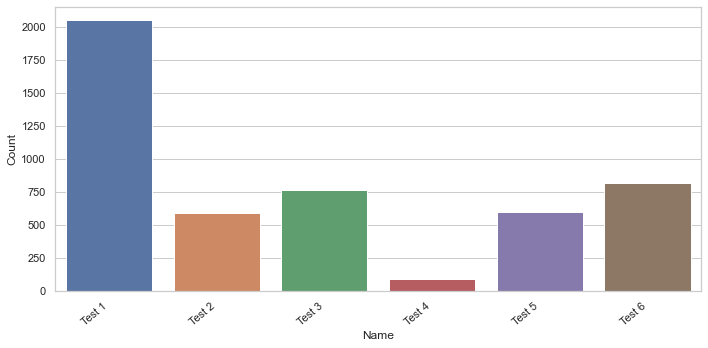

In [8]:
# plot dfClashTests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Name", y="Count", data=dfClashTests)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
clashs = []
for i in range(len(clashtests)):
    clashsData = clashtests[i].Clashes
    for j in range(len(clashsData)):
        clashsdic = {}
        clashsdic["Name"] = clashsData[j].Name
        clashsdic["Guid"] = clashsData[j].Guid
        clashsdic["Level"] = clashsData[j].Level
        clashsdic["Status"] = clashsData[j].Status
        clashsdic["Distance"] = clashsData[j].Distance
        clashsdic["GridIntersect"] = clashsData[j].GridIntersect
        clashs.append(clashsdic)
dfClashes = pd.DataFrame(clashs).sort_values(by = "Name", ascending = True)
dfClashes.head(10)

,Name,Guid,Level,Status,Distance,GridIntersect
0,Clash1,74060d31-b6d7-4625-a229-ae49c79a77a3,Ceiling,New,-1.476378,B(-1)-7(-1)
3408,Clash1,26617bf5-9142-4848-bb8b-b08baf4e8bc9,,New,-0.196851,
2051,Clash1,1dea3642-9e25-480d-89c5-a8fcd69c9eaf,,New,-1.153989,
4314,Clash1,64fc8bfd-4cb7-4468-be8f-82c5d7cfb66a,,Active,-1.153989,
3494,Clash1,d49e4ce7-7cbd-42d5-82cf-b91a6a2ae29a,,New,-1.153989,
3405,Clash1,55280d2d-2c79-44d7-9703-089d7d7f9668,Level 1,Resolved,0.000000,A(6)-6
3503,Clash10,3bbe4f76-b781-430b-8287-4b477116ad04,Level 1,Approved,-0.164044,F-6
9,Clash10,08500953-aec7-4aa0-a9dd-3b19bc731ea9,,New,-0.984252,
2650,Clash10,185c3240-c530-48ae-92b4-a0e9a333e84f,Level 1,Reviewed,-0.295276,E-7(-1)
3417,Clash10,4379022d-e887-4fca-9075-899199a55250,,New,-0.032569,


In [10]:
# group dfClashes by Level 
dfClashes.groupby("Level").value_counts()

Level      Name      Guid                                  Status    Distance       GridIntersect
           Clash1    1dea3642-9e25-480d-89c5-a8fcd69c9eaf  New       -1.153989e+00                   1
                     26617bf5-9142-4848-bb8b-b08baf4e8bc9  New       -1.968513e-01                   1
           Clash413  5a74b840-b9bc-4ed9-a51d-a920e8c40c03  Approved  -1.421085e-14                   1
           Clash415  8775a4cf-29e7-4523-aca0-9762da194dd2  New       -3.879777e-08                   1
                     08a4b7b3-0b5d-4564-b124-e68751b16bca  Approved  -1.421085e-14                   1
                                                                                                    ..
Roof Line  Clash465  5dc4e13d-7954-408c-b5f9-43b2a708d0a0  New       -8.366394e-02  B-6              1
           Clash358  1a432881-ec3f-491d-9764-145300b322c3  New       -1.407305e-01  B-2              1
           Clash349  71f58bd7-7a6a-4680-8acd-2bd7cde6f5bf  New       -1.497990

In [11]:
# series of grid intersect 
dfClashes["GridIntersect"].value_counts()


               1375
C-5             289
B-2             151
C-6             129
B-5             123
               ... 
E(1)-7(-1)        1
C(-1)-7(-1)       1
D(-1)-7(-1)       1
A(3)-6            1
A-1(-1)           1
Name: GridIntersect, Length: 153, dtype: int64

In [12]:
# series of grid intersect 
dfClashes["Level"].value_counts()

Level 1      3049
             1375
Ceiling       358
Roof Line      77
Level 2        52
Name: Level, dtype: int64

In [13]:
# filter dfClashes with column "Level" = "Level 1"
dfClashLevel1 = dfClashes[dfClashes["Level"] == "Level 1"]
print("Count Clash Level 1: ", len(dfClashLevel1))
dfClashLevel1.head(10)

Count Clash Level 1:  3049


,Name,Guid,Level,Status,Distance,GridIntersect
3405,Clash1,55280d2d-2c79-44d7-9703-089d7d7f9668,Level 1,Resolved,0.000000,A(6)-6
3503,Clash10,3bbe4f76-b781-430b-8287-4b477116ad04,Level 1,Approved,-0.164044,F-6
2650,Clash10,185c3240-c530-48ae-92b4-a0e9a333e84f,Level 1,Reviewed,-0.295276,E-7(-1)
2060,Clash10,82985c26-ae8a-42b6-93c2-0de75d71eb90,Level 1,Resolved,-0.164044,F-6
4319,Clash10,185a6bdc-6aac-4c67-9fb5-3ecc66d7ce95,Level 1,Active,-0.255905,C-7
3593,Clash100,44c7867a-8975-4ee7-9543-a8215af957ea,Level 1,New,-0.009728,B-4(-1)
2150,Clash100,b58377a8-73a7-4617-b5e8-f540144f90b6,Level 1,New,-0.009728,B-4(-1)
2151,Clash101,27a21946-27b8-4e89-8aa5-1970c793f72b,Level 1,New,-0.009728,B-3
3594,Clash101,ec196899-fb0d-490c-b8f4-1a0295bd9d40,Level 1,New,-0.009728,B-3
2741,Clash101,1778fe7d-d5b6-42ef-a436-cd4abc052ff4,Level 1,New,-0.038398,G-7(-1)


In [14]:
# check how many clashes "Resolved" In Level 01
dfClashLevel1Resolved = dfClashLevel1[dfClashLevel1["Status"] == "Resolved"]
print("Number of Clash Resolved: ", len(dfClashLevel1Resolved))
dfClashLevel1Resolved.head(10)

Number of Clash Resolved:  253


,Name,Guid,Level,Status,Distance,GridIntersect
3405,Clash1,55280d2d-2c79-44d7-9703-089d7d7f9668,Level 1,Resolved,0.000000,A(6)-6
2060,Clash10,82985c26-ae8a-42b6-93c2-0de75d71eb90,Level 1,Resolved,-0.164044,F-6
2061,Clash11,3bf412b5-df34-45d7-9c2b-e2fd001b989e,Level 1,Resolved,-0.164044,F-6(1)
2751,Clash111,31ce58b7-447a-4e58-b198-71213b5c385a,Level 1,Resolved,-0.032808,C-1
2754,Clash114,6c4bce50-aea0-4a18-bf28-fb9e5d1605a7,Level 1,Resolved,-0.031159,G-7
2755,Clash115,23e2af03-6cb4-476f-aefb-eeb88749b953,Level 1,Resolved,-0.031159,G-5
2756,Clash116,61d1988c-234d-4381-8846-33d520293f8a,Level 1,Resolved,-0.027878,G-7
2757,Clash117,966abb3b-0a25-4d9c-a101-91c81f24bab1,Level 1,Resolved,-0.026168,B-5
2758,Clash118,e7b766a3-aa5a-4d12-b908-683adeacd995,Level 1,Resolved,-0.023761,C-4
2759,Clash119,af472624-567a-48c5-a6d1-8e7a873cf249,Level 1,Resolved,-0.023761,C-4


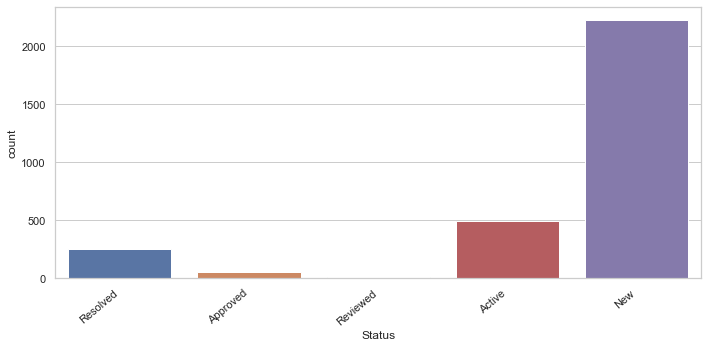

In [15]:
# Visualize the dfClashLevel1 by category column Status
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Status", data=dfClashLevel1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [17]:
def GetClashTest(base):
    clashtests = base["ClashTests"]
    tests = []
    for i in range(len(clashtests)):
        test = {}
        test["Name"] = clashtests[i].Name
        test["Count"] = clashtests[i].ClashCount
        test["Guid"] = clashtests[i].Guid
        test["LastRun"] = clashtests[i].LastRun
        tests.append(test)   
    dfClashTests =  pd.DataFrame(tests).sort_values(by = "Name", ascending = True)
    return dfClashTests
def GetClash(base):
    clashs = []
    clashtests = base["ClashTests"]
    for i in range(len(clashtests)):
        clashsData = clashtests[i].Clashes
        for j in range(len(clashsData)):
            clashsdic = {}
            clashsdic["Name"] = clashsData[j].Name
            clashsdic["Guid"] = clashsData[j].Guid
            clashsdic["Level"] = clashsData[j].Level
            clashsdic["Status"] = clashsData[j].Status
            clashsdic["Distance"] = clashsData[j].Distance
            clashsdic["GridIntersect"] = clashsData[j].GridIntersect
            clashs.append(clashsdic)
    dfClashes = pd.DataFrame(clashs).sort_values(by = "Name", ascending = True)
    return dfClashes
def compareVersion(streamId):
    transport = ServerTransport(client=client, stream_id=streamId)
    commitA = client.commit.list(stream_id=streamId)[0]
    commitB = client.commit.list(stream_id=streamId)[1]
    BaseA = operations.receive(commitA.referencedObject, remote_transport=transport)
    BaseB = operations.receive(commitB.referencedObject, remote_transport=transport)
    clashtestsA = GetClashTest(BaseA)
    clashtestsB = GetClashTest(BaseB)
    clashsA = GetClash(BaseA)
    clashsB = GetClash(BaseB)
    return clashtestsA,clashtestsB,clashsA,clashsB
dfTestA,dfTestB,dfClashA,dfClashB = compareVersion(streamId=streamId)
dfClashA.head(10)

,Name,Guid,Level,Status,Distance,GridIntersect
0,Clash1,74060d31-b6d7-4625-a229-ae49c79a77a3,Ceiling,New,-1.476378,B(-1)-7(-1)
3408,Clash1,26617bf5-9142-4848-bb8b-b08baf4e8bc9,,New,-0.196851,
2051,Clash1,1dea3642-9e25-480d-89c5-a8fcd69c9eaf,,New,-1.153989,
4314,Clash1,64fc8bfd-4cb7-4468-be8f-82c5d7cfb66a,,Active,-1.153989,
3494,Clash1,d49e4ce7-7cbd-42d5-82cf-b91a6a2ae29a,,New,-1.153989,
3405,Clash1,55280d2d-2c79-44d7-9703-089d7d7f9668,Level 1,Resolved,0.000000,A(6)-6
3503,Clash10,3bbe4f76-b781-430b-8287-4b477116ad04,Level 1,Approved,-0.164044,F-6
9,Clash10,08500953-aec7-4aa0-a9dd-3b19bc731ea9,,New,-0.984252,
2650,Clash10,185c3240-c530-48ae-92b4-a0e9a333e84f,Level 1,Reviewed,-0.295276,E-7(-1)
3417,Clash10,4379022d-e887-4fca-9075-899199a55250,,New,-0.032569,


In [18]:
# check row in ClashA had updated
merged = dfClashA.merge(dfClashB, indicator=True, how='outer')
merged[merged['_merge'] == 'left_only']

,Name,Guid,Level,Status,Distance,GridIntersect,_merge
4368,Clash732,a344d78e-bde2-4559-841a-841a6f44b836,Ceiling,Active,0.0,B-5,left_only
4369,Clash733,6b995b78-8d1c-4eef-905d-5a49ce035c18,Level 1,Active,0.0,B-5,left_only
4374,Clash734,2ffbe989-1778-4ccf-8277-0a169429d238,Level 1,Active,0.0,B(1)-5(1),left_only
4377,Clash735,982ba406-007d-4fab-8a7f-7299390050d1,Level 1,Active,0.0,B(1)-5(1),left_only
4383,Clash737,6c2f4498-81d4-45f7-8f36-3da8ee86e471,Level 1,Approved,0.0,B-5(1),left_only
4384,Clash738,9851f018-9433-4547-9992-43f87019ba49,Level 1,Approved,0.0,B-5(1),left_only
4387,Clash739,d04571f9-cd70-4b70-be93-14bc9ffa8584,Level 1,Approved,0.0,B(1)-5(1),left_only
4398,Clash740,1a0b3d1c-39e2-4ed1-83a5-f8df4a98c1f6,Level 1,Approved,0.0,B-5(1),left_only


In [19]:
# check row in ClashB had changed
merged = dfClashA.merge(dfClashB, indicator=True, how='outer')
merged[merged['_merge'] == 'right_only']

,Name,Guid,Level,Status,Distance,GridIntersect,_merge
4911,Clash732,a344d78e-bde2-4559-841a-841a6f44b836,Ceiling,Resolved,0.0,B-5,right_only
4912,Clash733,6b995b78-8d1c-4eef-905d-5a49ce035c18,Level 1,Resolved,0.0,B-5,right_only
4913,Clash734,2ffbe989-1778-4ccf-8277-0a169429d238,Level 1,Resolved,0.0,B(1)-5(1),right_only
4914,Clash735,982ba406-007d-4fab-8a7f-7299390050d1,Level 1,Resolved,0.0,B(1)-5(1),right_only
4915,Clash737,6c2f4498-81d4-45f7-8f36-3da8ee86e471,Level 1,Resolved,0.0,B-5(1),right_only
4916,Clash738,9851f018-9433-4547-9992-43f87019ba49,Level 1,Resolved,0.0,B-5(1),right_only
4917,Clash739,d04571f9-cd70-4b70-be93-14bc9ffa8584,Level 1,Resolved,0.0,B(1)-5(1),right_only
4918,Clash740,1a0b3d1c-39e2-4ed1-83a5-f8df4a98c1f6,Level 1,Resolved,0.0,B-5(1),right_only


In [20]:
# it mea class latest version has change from resolve  to approved
dfClashA.compare(dfClashB)

Status          
          self     other
3372    Active  Resolved
3373    Active  Resolved
3374    Active  Resolved
3375    Active  Resolved
3377  Approved  Resolved
3378  Approved  Resolved
3379  Approved  Resolved
3380  Approved  Resolved

In [21]:
# compare two dataframes
df_diff = pd.concat([dfClashA,dfClashB]).drop_duplicates(keep=False)
df_diff

,Name,Guid,Level,Status,Distance,GridIntersect
3372,Clash732,a344d78e-bde2-4559-841a-841a6f44b836,Ceiling,Active,0.0,B-5
3373,Clash733,6b995b78-8d1c-4eef-905d-5a49ce035c18,Level 1,Active,0.0,B-5
3374,Clash734,2ffbe989-1778-4ccf-8277-0a169429d238,Level 1,Active,0.0,B(1)-5(1)
3375,Clash735,982ba406-007d-4fab-8a7f-7299390050d1,Level 1,Active,0.0,B(1)-5(1)
3377,Clash737,6c2f4498-81d4-45f7-8f36-3da8ee86e471,Level 1,Approved,0.0,B-5(1)
3378,Clash738,9851f018-9433-4547-9992-43f87019ba49,Level 1,Approved,0.0,B-5(1)
3379,Clash739,d04571f9-cd70-4b70-be93-14bc9ffa8584,Level 1,Approved,0.0,B(1)-5(1)
3380,Clash740,1a0b3d1c-39e2-4ed1-83a5-f8df4a98c1f6,Level 1,Approved,0.0,B-5(1)
3372,Clash732,a344d78e-bde2-4559-841a-841a6f44b836,Ceiling,Resolved,0.0,B-5
3373,Clash733,6b995b78-8d1c-4eef-905d-5a49ce035c18,Level 1,Resolved,0.0,B-5
